# Correlation Analysis

## Overview

Conduct a correlation analysis for the following metrics: 

- **Productivity** - Cases per man hour (CPMH)
- **Average Selector days**
- **Employees with USF over 365 days**:
- **Turnover**

## Problem Statement 
Is there a relationship between **Productivity**, **Average Selector Days**, **Selector with USF over 365 days** & **Turnover**. 

## Contributors

Richard Avila
Perman Rejepov
LeeRyan Solomon.
## Dataset
- Data was provided in an excel sheet and extracts from a tableau report.
- Each combination of market and fiscal month is a data point, in other words the analysis was done on all USF markets.
- All null values is excluded from this analysis.
- Time period for this analysis is between April and November.
- The YoY change is for 2019 & 2020.

## Final Thoughts TL:DR

#### Correlation Results

- **Correlation coefficient** for cpmh vs average selector days is **0.36**
- **Correlation coefficient** for cpmh vs employees at USF over 365 days hours is **0.32**
- **Correlation coefficient** for cpmh vs turnover is **-0.12**

The correlation coefficents are not that strong but the direction of the correlation makes sense for example when there
is a high turnover CPMH will be lower which is indicative with a negative correlation of -0.12 but not a strong one and
the same can be said for the other two metrics. Below are few things to consider that may provide better results:

- Look at actual values and move away from percentages.
- Get more data points and look at each markets separately because all markets are not alike in size and the way it operates.
- Also somehow normalize each features. (This can be a discussion).
- Determine how to treat anamolies. For example a Selector has total cases recorded but no recorded total hours, does
  this record get included or excluded when conducting this analysis or make some assumption and assign some hours when
  not available.


### Importing all dependencies

In [2]:
import os
os.chdir('/workspace')
from src.utils import correlation_result, plot_correlation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.core.pylabtools import figsize

### Importing Dataset 
- Data is being imported via a `csv` file and being put into a `dataframe`
- Checking all the columns since it's needed to ingest when running the correlation using the functions `correlation_results` and `plot_correlation`
- Creating a new dataframe that drops all the nulls mostly in **Turnover**

#### Fields in the file
- **uid**: Market_Name - Market_Number - Branch_Cd - Fiscal_month. 
- **prcnt_chng_avg_selector_days**: YoY percent change in of Average Selectors in Days.
- **prcnt_chng_over_365_days**: YoY percent change in Employees over 365 days hours. 
- **prcnt_chng_cpmh**: YoY percent change in Cases per Man Hours.
- **prcnt_chng_cpmh_na**:YoY percent change in Cases per Man Hours. This column is identical to **prcnt_chng_cpmh**  but values are taken out when **turnover** are null.  
- **prcnt_chng_turnover**: YoY percent change in Turnover. Any nulls are not included in the analysis. 

In [3]:
all_mkts_df = pd.read_csv('./data/ot_tenure_cpmh.csv')

In [4]:
all_mkts_df.columns

Index(['uid', 'prcnt_chng_avg_selector_days', 'prcnt_chng_over_365_days',
       'prcnt_chng_cpmh', 'prcnt_chng_cpmh_na', 'prcnt_chng_turnover'],
      dtype='object')

In [5]:
all_mkts_df_na = all_mkts_df.dropna()

In [6]:
def correlation_result(df, column1, column2):
    """Function takes in a dataframe and provides a correlation coefficient
       for any two columns defined in the function. 
       df.columns to see what are the column names
       
    :param df: Pandas DataFrame 
    :type:    dataframe
    
    :param column1: Column name with the dataframe
    :type:          columns
    
    :param column2: Column name with the dataframe
    :type:          columns 
    
    Example: correlation_results(df, 'my_first_column', 'my_second_column')  
    """
    
    col1 = df[column1]
    col2 = df[column2]
    corr_result = round(col1.corr(col2),2)
    print(f"Correlation {column1} and {column2} is {corr_result}")
    

In [7]:
correlation_result(all_mkts_df,'prcnt_chng_cpmh', 'prcnt_chng_avg_selector_days')
correlation_result(all_mkts_df,'prcnt_chng_cpmh', 'prcnt_chng_over_365_days')
correlation_result(all_mkts_df_na,'prcnt_chng_cpmh_na', 'prcnt_chng_turnover')

Correlation prcnt_chng_cpmh and prcnt_chng_avg_selector_days is 0.36
Correlation prcnt_chng_cpmh and prcnt_chng_over_365_days is 0.32
Correlation prcnt_chng_cpmh_na and prcnt_chng_turnover is -0.12


In [8]:
def plot_correlation(df=None,
                     y_column=None,
                     x_column=None,
                     title=None,
                     x_label=None):
    """Takes in dataframe and columns within the datafram and plots a scatter plot
       including title and x axis labels. 
       This plots only one plot at a time cannot pass in multiple columns to do a scatter plot.
       NOTE: y_label is hard coded in this function. Changes can be made in utils.py
       
   :params df: A Dataframe needs to be passed in
   :type:      Pandas dataframe
   
   :params y_column: A column name from the dataframe in quotes
   :type:            str
   :Example:         y_column='prcnt_chng_cpmh'
   
   :params x_column: A column name from the dataframe in quotes
   :type:            str
   :Example:         x_column='prcnt_chng_avg_selector_days'
   
   :params title:    A string as a title of the plot
   :type:            str
   :Example:         title='Sactter Plot CPMH percent change YoY vs Average Selector day percent change YoY'
   
   :params x_label:  A string for the x axis 
   :type:            str
   :Example:         title='Sactter Plot CPMH percent change YoY vs Average Selector day percent change YoY'
   
   :Example:        Function in use.
                    plot_correlation(df=all_mkts_df,
                                     y_column='prcnt_chng_cpmh',
                                     x_column='prcnt_chng_avg_selector_days',
                                     title='Sactter Plot CPMH percent change YoY vs Average Selector day percent change YoY',
                                     x_label='Average Selector day change YoY')
    """

    figsize(16, 8)
    sn.set()
    fig, ax = plt.subplots()
    ax.scatter(df[[x_column]], df[[y_column]], color='#ff9933', edgecolor='black')
    ax.set_title(title, fontsize=24, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=16, fontweight='bold')
    ax.set_ylabel("CPMH change YoY", fontsize=16, fontweight='bold')
    ax.tick_params(axis="both", labelsize=14)

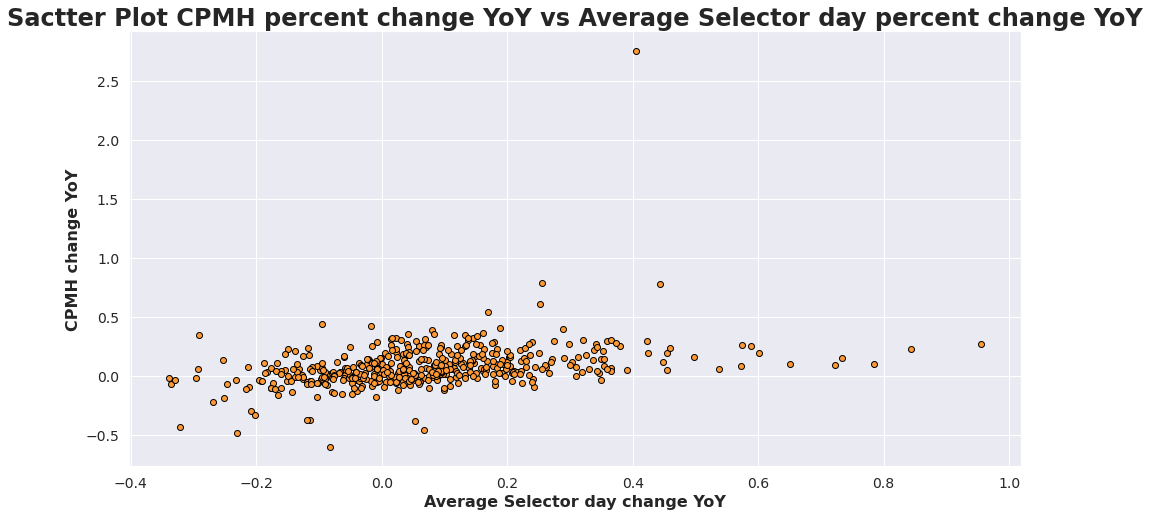

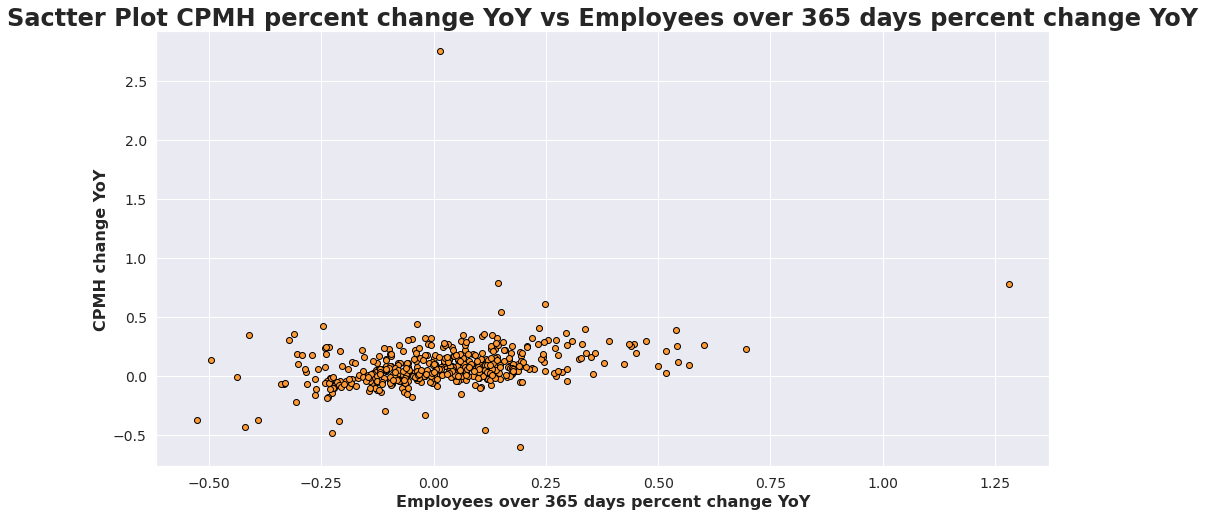

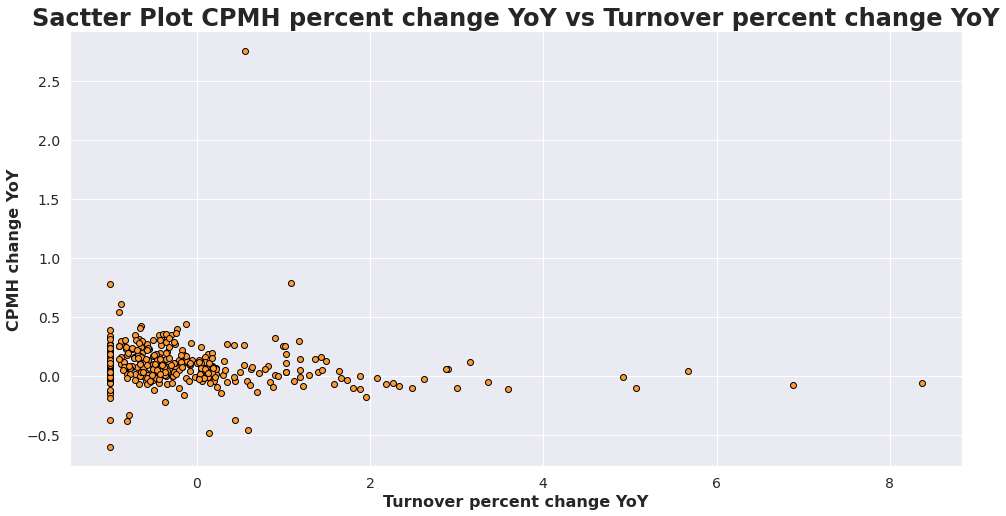

In [9]:
plot_correlation(df=all_mkts_df,
                 y_column='prcnt_chng_cpmh',
                 x_column='prcnt_chng_avg_selector_days',
                 title='Sactter Plot CPMH percent change YoY vs Average Selector day percent change YoY',
                 x_label='Average Selector day change YoY')

plot_correlation(df=all_mkts_df,
                 y_column='prcnt_chng_cpmh',
                 x_column='prcnt_chng_over_365_days',
                 title='Sactter Plot CPMH percent change YoY vs Employees over 365 days percent change YoY',
                 x_label='Employees over 365 days percent change YoY')

plot_correlation(df=all_mkts_df_na,
                 y_column='prcnt_chng_cpmh_na',
                 x_column='prcnt_chng_turnover',
                 title='Sactter Plot CPMH percent change YoY vs Turnover percent change YoY',
                 x_label='Turnover percent change YoY')